In [2]:
import pandas as pd

ModuleNotFoundError: No module named 'pandas'

In [ ]:
df=pd.read_csv('Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [ ]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [ ]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [ ]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [ ]:
df=df.astype(int)


In [ ]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:

x=df.drop(columns=['Exited'])
y=df['Exited']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8000, 11), (2000, 11), (8000,), (2000,))

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scalar=StandardScaler()

In [ ]:
x_train_scaled=scalar.fit_transform(x_train)

In [ ]:
x_test_scaled=scalar.transform(x_test)

In [ ]:
x_test_scaled

array([[-1.03768121,  0.77498705, -1.0482813 , ..., -0.58312392,
        -0.57273139,  0.91509065],
       [ 0.30708683, -0.46686456, -0.70174202, ..., -0.58312392,
        -0.57273139,  0.91509065],
       [-1.23422423,  0.29735181, -1.0482813 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       ...,
       [-0.86182692, -0.46686456,  1.72403288, ..., -0.58312392,
         1.74601919,  0.91509065],
       [-0.30323097, -0.84897275, -1.0482813 , ...,  1.71490137,
        -0.57273139, -1.09278791],
       [ 0.04847759,  1.25262228,  1.3774936 , ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [ ]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model=Sequential()

In [ ]:
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))

In [ ]:
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 11)                132       
                                                                 
 dense_9 (Dense)             (None, 11)                132       
                                                                 
 dense_10 (Dense)            (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history=model.fit(x_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 1s 5ms/step - loss: 0.3131 - accuracy: 0.8711 - val_loss: 0.3425 - val_accuracy: 0.8587
Epoch 2/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3128 - accuracy: 0.8694 - val_loss: 0.3407 - val_accuracy: 0.8625
Epoch 3/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3123 - accuracy: 0.8700 - val_loss: 0.3432 - val_accuracy: 0.8606
Epoch 4/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3123 - accuracy: 0.8708 - val_loss: 0.3421 - val_accuracy: 0.8594
Epoch 5/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3128 - accuracy: 0.8706 - val_loss: 0.3417 - val_accuracy: 0.8606
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3124 - accuracy: 0.8698 - val_loss: 0.3434 - val_accuracy: 0.8606
Epoch 7/100
200/200 [==============================] - 1s 4ms/step - loss: 0.3120 - accuracy: 0.8709 - val_loss: 0.3423 - val_accuracy: 0.8594

In [ ]:
model.layers[1].get_weights()

[array([[ 0.10549168,  0.07679699,  0.72416633,  0.8252019 ,  0.6066436 ,
          0.2633859 ,  0.00912583, -0.6348977 , -0.07028702, -0.16219136,
          0.03342914],
        [-0.48432902,  0.17403565,  0.18049583, -1.5720719 ,  0.43080795,
          0.5203275 ,  0.3362702 , -0.31976646,  0.06937768, -0.4260658 ,
         -0.5847622 ],
        [-1.1852092 ,  0.16684987,  0.10956649, -0.5258526 , -0.07320859,
          0.17574717,  0.47481662,  0.45461637, -0.55634516,  0.25508842,
         -0.17835754],
        [ 0.32191348, -1.0003746 , -0.4093988 ,  1.0807272 , -0.60536116,
         -0.44601443, -0.04725327,  1.7215716 ,  0.2951713 , -0.06656085,
          0.28963286],
        [-0.23511738,  0.52724373,  0.10523833, -0.47886902,  0.28419086,
          0.4606889 , -0.15213588, -0.07289219,  0.15808459,  0.05343848,
          0.36188465],
        [ 0.8290554 , -1.1963818 , -0.09246912, -0.7841671 , -0.304383  ,
         -0.33724654,  0.02266508, -0.453389  ,  0.46713874,  0.3215021

In [ ]:
y_log=model.predict(x_test_scaled)

63/63 [==============================] - 0s 3ms/step


In [ ]:
import numpy as np

In [ ]:
np.where(y_log>0.5,1,0)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,np.where(y_log>0.5,1,0))

0.8615

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
history.history

{'loss': [0.3130585551261902,
  0.31284576654434204,
  0.31227463483810425,
  0.3122904598712921,
  0.31277287006378174,
  0.31243473291397095,
  0.3119676113128662,
  0.312480092048645,
  0.31225135922431946,
  0.3120615482330322,
  0.3117729723453522,
  0.312283456325531,
  0.31148582696914673,
  0.31175902485847473,
  0.31162863969802856,
  0.310894250869751,
  0.3116620182991028,
  0.3104029893875122,
  0.3119921386241913,
  0.31069228053092957,
  0.31113743782043457,
  0.31048470735549927,
  0.31088006496429443,
  0.3106185495853424,
  0.3107457458972931,
  0.310520738363266,
  0.31026020646095276,
  0.3108178377151489,
  0.3100390136241913,
  0.3102852702140808,
  0.3103053569793701,
  0.30981332063674927,
  0.3095510005950928,
  0.31017741560935974,
  0.3099575638771057,
  0.3097708225250244,
  0.3089771270751953,
  0.3098817765712738,
  0.309226393699646,
  0.30935758352279663,
  0.30917736887931824,
  0.30987846851348877,
  0.30869004130363464,
  0.30882179737091064,
  0.30932

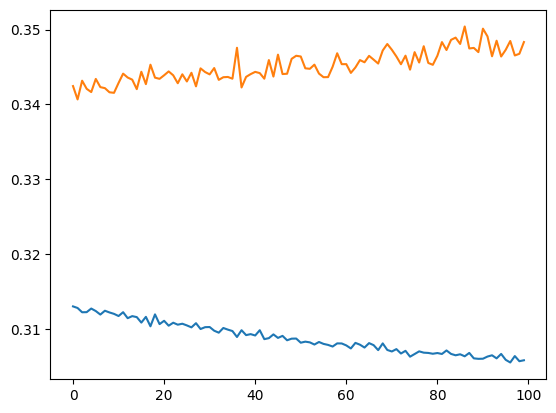

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

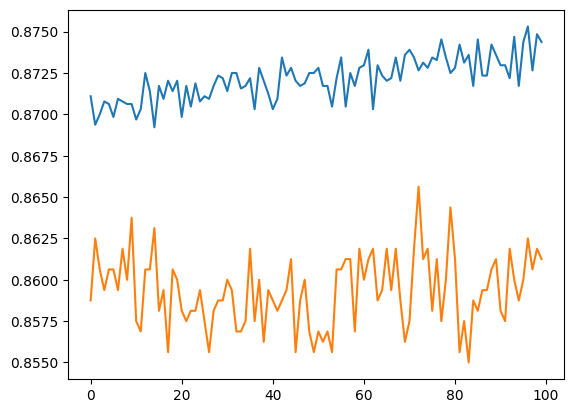

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])